In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string

### For some reason, there are broken table tags in a lot of the tables below when they're rendered on Github. They don't actually look like that

In [2]:
df = pd.read_csv('../data/JEOPARDY_CSV.csv', encoding='utf-8')
# full_df = pd.read_csv('../data/JEOPARDY_CSV.csv', encoding='utf-8')
# print full_df.shape
# full_df.head()

In [3]:
# df = full_df.sample(frac=0.1)
# df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [5]:
# Remove the dumb spaces
df.columns = ['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question', 'Answer']

# Convert to Datetime
df['Air Date'] = pd.to_datetime(df['Air Date'])

# Clean out Value column
df['Value'] = df['Value'].str.replace('$','')
df['Value'] = df['Value'].str.replace(',','')
df['Value'] = df['Value'].apply(lambda x: None if x == 'None' else int(x))
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [6]:
df['Question'].value_counts()[0:5]

[audio clue]     17
[video clue]     14
[filler]          5
(audio clue)      5
Abigail Smith     4
Name: Question, dtype: int64

In [7]:
df.shape

(216930, 7)

In [8]:
# Drop some useless questions
df = df[df['Question'] != '[audio clue]']
df = df[df['Question'] != '[video clue]']
df = df[df['Question'] != '[filler]']
df = df[df['Question'] != '(audio clue)']

In [9]:
df.shape

(216889, 7)

In [10]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
print len(stopwords)
print stopwords[:10]

153
[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your']


In [11]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [12]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [13]:
def create_clean_columns(df):    
    df['clean_question'] = df['Question'].apply(cleanhtml)
    df['clean_answer'] = df['Answer'].apply(cleanhtml)
    df['clean_category'] = df['Category'].apply(cleanhtml)
    df['everything'] = df['clean_question']+' '+df['clean_answer']+' '+df['clean_category']
    return df

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    cleantext = cleantext.replace('\n', '')
    cleantext = cleantext.replace('-', ' ')
#     cleantext = cleantext.translate(None, string.punctuation)
#     cleantext = cleantext.replace('\'', '')
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    cleantext = regex.sub('', cleantext)
    cleantext = cleantext.lower()
    return cleantext

In [14]:
create_clean_columns(df)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_category,everything
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,history,for the last 8 years of his life galileo was u...
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,espns top 10 all time athletes,no 2 1912 olympian football star at carlisle i...
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,everybody talks about it,the city of yuma in this state has a record av...
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,the company line,in 1963 live on the art linkletter show this c...
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,epitaphs tributes,signer of the dec of indep framer of the const...
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,200.0,"In the title of an Aesop fable, this insect sh...",the ant,in the title of an aesop fable this insect sha...,the ant,3 letter words,in the title of an aesop fable this insect sha...
6,4680,2004-12-31,Jeopardy!,HISTORY,400.0,Built in 312 B.C. to link Rome & the South of ...,the Appian Way,built in 312 bc to link rome the south of ita...,the appian way,history,built in 312 bc to link rome the south of ita...
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,400.0,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan,no 8 30 steals for the birmingham barons 2306 ...,michael jordan,espns top 10 all time athletes,no 8 30 steals for the birmingham barons 2306 ...
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,400.0,"In the winter of 1971-72, a record 1,122 inche...",Washington,in the winter of 1971 72 a record 1122 inches ...,washington,everybody talks about it,in the winter of 1971 72 a record 1122 inches ...
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,400.0,This housewares store was named for the packag...,Crate & Barrel,this housewares store was named for the packag...,crate barrel,the company line,this housewares store was named for the packag...


In [159]:
# questions = df['clean_question'].values
questions = df['everything'].values
# categories = df['clean_category'].values
# answers = df['clean_answer'].values

In [16]:
nltk.tag.pos_tag(questions[0].split())

[(u'for', 'IN'),
 (u'the', 'DT'),
 (u'last', 'JJ'),
 (u'8', 'CD'),
 (u'years', 'NNS'),
 (u'of', 'IN'),
 (u'his', 'PRP$'),
 (u'life', 'NN'),
 (u'galileo', 'NN'),
 (u'was', 'VBD'),
 (u'under', 'IN'),
 (u'house', 'NN'),
 (u'arrest', 'NN'),
 (u'for', 'IN'),
 (u'espousing', 'VBG'),
 (u'this', 'DT'),
 (u'mans', 'VBZ'),
 (u'theory', 'NN')]

In [17]:
nouns_only = []
for i in range(len(questions)):
    nouns_only.append([w[0] for w in nltk.tag.pos_tag(questions[i].split()) if w[1] in ['NN', 'NNS', 'NNP', 'NNPS']])

In [18]:
for i in range(len(nouns_only)):
    nouns_only[i] = ' '.join(nouns_only[i])

In [19]:
nouns_only = filter(None, nouns_only)

In [20]:
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in questions:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'questions', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [21]:
parts = nltk.tag.pos_tag(totalvocab_tokenized)

In [22]:
vocab_frame = pd.DataFrame(totalvocab_tokenized, index = totalvocab_stemmed, columns=['Words'])

In [23]:
vocab_frame.shape

(3013774, 1)

In [24]:
vocab_frame.head(20)

,Words
for,for
the,the
last,last
year,years
of,of
his,his
life,life
galileo,galileo
was,was
under,under


In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib

# tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=100000,
#                                  min_df=0.001, stop_words='english',
#                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100000, use_idf=True,
                                 tokenizer=tokenize_and_stem, ngram_range=(1,3))

# tfidf_vectorizer = TfidfVectorizer(stop_words='english',
#                                  tokenizer=tokenize_only, ngram_range=(1,3))

# %time tfidf_matrix = tfidf_vectorizer.fit_transform(questions)

%time tfidf_vectorizer.fit(questions)
# tfidf_vectorizer.fit(nouns_only)

# More memory efficient to dump the model and then load it
joblib.dump(tfidf_vectorizer, 'tfidf_test.pkl')

CPU times: user 2min 27s, sys: 804 ms, total: 2min 28s
Wall time: 2min 27s


['tfidf_test.pkl', 'tfidf_test.pkl_01.npy', 'tfidf_test.pkl_02.npy']

In [231]:
tfidf_vectorizer = joblib.load('tfidf_test.pkl')
%time tfidf_matrix = tfidf_vectorizer.transform(questions)
# tfidf_matrix = tfidf_vectorizer.transform(nouns_only)

CPU times: user 2min, sys: 436 ms, total: 2min
Wall time: 2min


In [232]:
tfidf_matrix.shape

(216889, 100000)

In [233]:
terms = tfidf_vectorizer.get_feature_names()

In [234]:
# from sklearn.metrics.pairwise import cosine_similarity
# dist = 1 - cosine_similarity(tfidf_matrix)

In [235]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vectorizer = CountVectorizer(stop_words='english', max_features=100000)

In [236]:
from sklearn.metrics import silhouette_score

def silhouette_selection(x, k):
    scores = []
    for iteration in range(50, k, 10):
        print('Number of clusters: %s' % iteration)
#         km = KMeans(n_clusters=iteration)
#         km.fit(x)
#         sil_score = silhouette_score(x, km.labels_)
        agglo = AgglomerativeClustering(n_clusters=iteration)
        agglo.fit(tsvd_matrix)
        sil_score = silhouette_score(x, agglo.labels_)
        print(sil_score)
        scores.append((iteration, sil_score))
    return scores

In [237]:
# sil_scores = silhouette_selection(tfidf_matrix, 160)

In [238]:
# min([x[1] for x in sil_scores])

In [ ]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=5000)
%time tsvd.fit(tfidf_matrix)
joblib.dump(tsvd, 'tsvd.pkl')

In [240]:
tsvd = joblib.load('tsvd.pkl')
%time tsvd_matrix = tsvd.transform(tfidf_matrix)

CPU times: user 60 ms, sys: 0 ns, total: 60 ms
Wall time: 30.3 ms


In [241]:
# tsvd.explained_variance_ratio_

In [242]:
np.cumsum(tsvd.explained_variance_ratio_)

array([ 0.000648 ,  0.0023694])

In [265]:
from sklearn.preprocessing import StandardScaler

tsvd_word_data_standardized = StandardScaler().fit_transform(tsvd_matrix)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [243]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN

num_clusters = 100

In [244]:
km = KMeans(n_clusters=num_clusters, n_jobs=-1)
# minikm = MiniBatchKMeans(n_clusters=num_clusters)
# agglo = AgglomerativeClustering(n_clusters=num_clusters)
# db = DBSCAN(eps=0.3, min_samples=10)

%time km.fit(tfidf_matrix)
# %time minikm.fit(tfidf_matrix)
# %time agglo.fit(tsvd_matrix)
# %time db.fit(tfidf_matrix)

clusters = km.labels_.tolist()
# clusters = minikm.labels_.tolist()
# clusters = agglo.labels_.tolist()
# clusters = db.labels_.tolist()
joblib.dump(km, 'kmeans.pkl')

CPU times: user 3.52 s, sys: 2.22 s, total: 5.73 s
Wall time: 16min 33s


['kmeans.pkl', 'kmeans.pkl_01.npy', 'kmeans.pkl_02.npy']

In [175]:
tsvd_matrix.shape

(216889, 2)

In [176]:
agglo = AgglomerativeClustering(n_clusters=num_clusters)#, memory=joblib.Memory(cachedir='/tmp/memory_cache'))

In [177]:
# %time agglo.fit(tsvd_matrix)
# clusters = agglo.labels_.tolist()

In [178]:
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [179]:
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))


In [180]:
# km.predict(df['clean_question'].values)

In [181]:
df['Cluster'] = clusters

In [182]:
df['Cluster'].value_counts()

7     58671
18     3624
48     3622
97     3530
10     3427
4      3424
14     3313
42     3197
22     3196
99     3123
61     2997
36     2983
50     2913
45     2758
30     2569
28     2552
71     2550
27     2504
98     2487
70     2428
46     2284
19     2257
35     2222
9      2204
47     2165
34     2120
93     2107
92     2090
16     2035
13     1988
      ...  
77     1049
25     1033
76     1002
68      997
11      968
55      965
6       928
85      884
96      857
73      844
56      793
5       768
57      698
15      672
39      658
89      641
37      626
54      610
83      603
91      591
81      580
12      574
24      562
74      548
69      497
64      432
95      372
8       348
38      345
82       64
Name: Cluster, dtype: int64

In [57]:
df[df['Cluster'] == 19]

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_category,everything,Cluster
34,4680,2004-12-31,Double Jeopardy!,"""X""s & ""O""s",400.0,Around 100 A.D. Tacitus wrote a book on how th...,oratory,around 100 ad tacitus wrote a book on how this...,oratory,xs os,around 100 ad tacitus wrote a book on how this...,19
88,5957,2010-07-06,Double Jeopardy!,JUST THE FACTS,400.0,This hero of several books is 11 when he disco...,Harry Potter,this hero of several books is 11 when he disco...,harry potter,just the facts,this hero of several books is 11 when he disco...,19
138,3751,2000-12-18,Jeopardy!,"""I"" LADS",400.0,His is the first & longest book of the Bible's...,Isaiah,his is the first longest book of the bibles m...,isaiah,i lads,his is the first longest book of the bibles m...,19
143,3751,2000-12-18,Jeopardy!,TRAVEL & TOURISM,500.0,"Andrea Palladio's 1554 book on ""The Antiquitie...",Rome,andrea palladios 1554 book on the antiquities ...,rome,travel tourism,andrea palladios 1554 book on the antiquities ...,19
214,3673,2000-07-19,Double Jeopardy!,ANGELS,400.0,"In Book III of ""Paradise Lost"", the angels pla...",harps,in book iii of paradise lost the angels play t...,harps,angels,in book iii of paradise lost the angels play t...,19
351,5690,2009-05-08,Double Jeopardy!,AMERICAN AUTHORS,2000.0,He reviewed films & TV for the New Republic be...,Philip Roth,he reviewed films tv for the new republic bef...,philip roth,american authors,he reviewed films tv for the new republic bef...,19
653,4107,2002-06-11,Double Jeopardy!,WORLD RELIGION,2000.0,"Made up of 1,028 hymns in 10 books, it's the o...",Rigveda,made up of 1028 hymns in 10 books its the olde...,rigveda,world religion,made up of 1028 hymns in 10 books its the olde...,19
762,5851,2010-02-08,Double Jeopardy!,LIT MY FIRE,1200.0,"In Book 1 of this, Satan is ""hurld hedlong fla...",Paradise Lost,in book 1 of this satan is hurld hedlong flami...,paradise lost,lit my fire,in book 1 of this satan is hurld hedlong flami...,19
799,4335,2003-06-06,Jeopardy!,MY PLACE?,800.0,"A book subtitled ""Architecture in the Colombia...",haciendas,a book subtitled architecture in the colombian...,haciendas,my place,a book subtitled architecture in the colombian...,19
839,4541,2004-05-10,Jeopardy!,POLITICAL MOVIES,200.0,2 reporters unearth a political scandal that g...,All the President's Men,2 reporters unearth a political scandal that g...,all the presidents men,political movies,2 reporters unearth a political scandal that g...,19


In [79]:
# from sklearn.metrics import silhouette_score

# silhouette_score(tfidf_matrix, km.labels_)

In [80]:
from __future__ import print_function

cluster_words = []
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    cluster_words.append([])
    for ind in order_centroids[i, :10]: #replace 10 with n words per cluster
#         print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=',')
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
#         cluster_words[i].append('%s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
        cluster_words[i].append('%s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
    print() #add whitespace
    print() #add whitespace
    
#     print("Cluster %d categories:" % i, end='')
#     for cat in df.ix[i]['Category']#.values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace
    
# print()
# print()

Top terms per cluster:

Cluster 0 words: body, body, water, heaven, human, heaven, human, bones, body, temperature,

Cluster 1 words: means, adjective, adjective, verb, verb, use, term, phrase, literally, phrase,

Cluster 2 words: clue, crew, clue, sarah, sarah, sarah, jimmy, jimmy, jimmy, monitor,

Cluster 3 words: time, said, centurys, live, god, universe, water, popularized, creating, brand,

Cluster 4 words: telling, telling, story, tale, telling, dont, william, dont, book, novel,

Cluster 5 words: american, native, african, native, african, north, north, central, american, central,

Cluster 6 words: music, broadway, music, instruments, plays, composer, songs, country, broadway, based,

Cluster 7 words: born, die, mans, mans, city, president, president, country, star, state,

Cluster 8 words: wrote, works, author, poet, poem, composer, songs, opera, john, life,

Cluster 9 words: ball, game, sport, use, golfing, hit, golfing, ball, hit, lucille,

Cluster 10 words: comes, word, comes

In [81]:
len(cluster_words)

100

In [82]:
cluster_names = []

for item in cluster_words:
    string = ''
    for i in item:
        string += i
        string += ' '
    cluster_names.append(string)

In [83]:
cluster_names

['body body water heaven human heaven human bones body temperature ',
 'means adjective adjective verb verb use term phrase literally phrase ',
 'clue crew clue sarah sarah sarah jimmy jimmy jimmy monitor ',
 'time said centurys live god universe water popularized creating brand ',
 'telling telling story tale telling dont william dont book novel ',
 'american native african native african north north central american central ',
 'music broadway music instruments plays composer songs country broadway based ',
 'born die mans mans city president president country star state ',
 'wrote works author poet poem composer songs opera john life ',
 'ball game sport use golfing hit golfing ball hit lucille ',
 'comes word comes greek comes french means term comes type ',
 'service secret secret military military postal arm provided postal began ',
 'organizations international international blood cell helped like human use member ',
 'national national park country state national anthem nationa

### Case study, one episode

In [116]:
print min(df['Show Number'])
print max(df['Show Number'])

1
6300


In [145]:
np.random.random_integers(6301)

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 6301 + 1) instead
  if __name__ == '__main__':


4130

In [213]:
one_show = df[df['Show Number'] == 5977]

In [214]:
one_show['Category'].value_counts()

CALDECOTT MEDAL & HONOR BOOKS       5
THE "A" LIST                        5
SORT THROUGH THE WORD PROBLEM       5
ROCK 'N OLD                         5
LIVING IN NYC                       5
EQUALS ONE                          5
THEY'RE IN HOW I MET YOUR MOTHER    5
KATIE COURIC, WITNESS TO HISTORY    5
WAIT FOR IT...                      5
LEGENDARY!                          5
IT'S GONNA "BE"...                  4
LITERARY & MOVIE TITLE OBJECTS      1
SUIT UP!                            1
Name: Category, dtype: int64

In [215]:
one_show['Cluster'].value_counts()

7     22
30     5
23     3
45     2
44     2
84     2
19     1
4      1
70     1
72     1
10     1
75     1
13     1
79     1
16     1
63     1
87     1
88     1
91     1
11     1
41     1
46     1
49     1
52     1
53     1
1      1
Name: Cluster, dtype: int64

In [216]:
one_tfidf = TfidfVectorizer(stop_words='english', max_features=100000, use_idf=True,
                                 tokenizer=tokenize_and_stem, ngram_range=(1,3))

one_tfidf.fit(one_show['everything'].values)
one_tfidf_matrix = one_tfidf.transform(one_show['everything'].values)

In [217]:
one_km = KMeans(n_clusters=13, n_jobs=-1)
%time one_km.fit(one_tfidf_matrix)
one_show_clusters = km.labels_.tolist()

CPU times: user 436 ms, sys: 208 ms, total: 644 ms
Wall time: 984 ms


In [218]:
one_show['Cluster'] = one_show_clusters

/home/nick/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [219]:
one_show['Cluster'].value_counts()

12    6
11    5
10    5
6     5
4     5
3     5
2     5
1     5
0     5
9     4
7     4
8     1
5     1
Name: Cluster, dtype: int64

In [220]:
one_show.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_category,everything,Cluster
205856,5977,2010-09-14,Jeopardy!,CALDECOTT MEDAL & HONOR BOOKS,200.0,Paul O. Zelinsky won the 1998 Medal for illust...,Rapunzel,paul o zelinsky won the 1998 medal for illustr...,rapunzel,caldecott medal honor books,paul o zelinsky won the 1998 medal for illustr...,10
205857,5977,2010-09-14,Jeopardy!,ROCK 'N OLD,200.0,Drumroll please! In July 2010 this Beatle tur...,Ringo Starr,drumroll please in july 2010 this beatle turn...,ringo starr,rock n old,drumroll please in july 2010 this beatle turn...,3
205858,5977,2010-09-14,Jeopardy!,EQUALS ONE,200.0,2.54 centimeters,one inch,254 centimeters,one inch,equals one,254 centimeters one inch equals one,1
205859,5977,2010-09-14,Jeopardy!,SORT THROUGH THE WORD PROBLEM,200.0,If Train A leaves Oamaru at 9 a.m. at 70 MPH &...,Wellington,if train a leaves oamaru at 9 am at 70 mph tr...,wellington,sort through the word problem,if train a leaves oamaru at 9 am at 70 mph tr...,4
205860,5977,2010-09-14,Jeopardy!,"THE ""A"" LIST",200.0,It's the absence of any form of political auth...,anarchy,its the absence of any form of political autho...,anarchy,the a list,its the absence of any form of political autho...,11


In [221]:
one_show[one_show['Cluster'] == 12]

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_category,everything,Cluster
205888,5977,2010-09-14,Double Jeopardy!,SUIT UP!,400.0,A suit of executive cut is for men who are a l...,heavy,a suit of executive cut is for men who are a l...,heavy,suit up,a suit of executive cut is for men who are a l...,12
205889,5977,2010-09-14,Double Jeopardy!,WAIT FOR IT...,400.0,The last time this came close to Earth was in ...,Halley's comet,the last time this came close to earth was in ...,halleys comet,wait for it,the last time this came close to earth was in ...,12
205894,5977,2010-09-14,Double Jeopardy!,WAIT FOR IT...,800.0,"This slow-moving ketchup used Carly Simon's ""A...",Heinz,this slow moving ketchup used carly simons ant...,heinz,wait for it,this slow moving ketchup used carly simons ant...,12
205899,5977,2010-09-14,Double Jeopardy!,WAIT FOR IT...,7000.0,"In this play, a boy says that the title charac...",Waiting for Godot,in this play a boy says that the title charact...,waiting for godot,wait for it,in this play a boy says that the title charact...,12
205904,5977,2010-09-14,Double Jeopardy!,WAIT FOR IT...,1600.0,Don't delay in telling us the name of this art...,(Edgar) Degas,dont delay in telling us the name of this arti...,edgar degas,wait for it,dont delay in telling us the name of this arti...,12
205909,5977,2010-09-14,Double Jeopardy!,WAIT FOR IT...,2000.0,She was a lady-in-waiting to Anne Boleyn befor...,Jane Seymour,she was a lady in waiting to anne boleyn befor...,jane seymour,wait for it,she was a lady in waiting to anne boleyn befor...,12


In [222]:
from sklearn.manifold import TSNE

In [223]:
one_tsne = TSNE()

graphing_data = one_tsne.fit_transform(one_tfidf_matrix.todense())

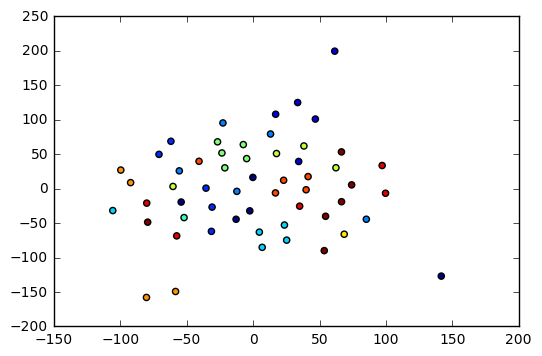

In [224]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(graphing_data[:,0], graphing_data[:,1], c=one_show_clusters) 

In [225]:
#use extend so it's a big flat list of vocab
one_totalvocab_stemmed = []
one_totalvocab_tokenized = []
for i in one_show['everything'].values:
    one_allwords_stemmed = tokenize_and_stem(i) #for each item in 'questions', tokenize/stem
    one_totalvocab_stemmed.extend(one_allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    one_allwords_tokenized = tokenize_only(i)
    one_totalvocab_tokenized.extend(one_allwords_tokenized)

In [226]:
one_vocab_frame = pd.DataFrame(one_totalvocab_tokenized, index = one_totalvocab_stemmed, columns=['Words'])
one_vocab_frame.head()

,Words
paul,paul
o,o
zelinski,zelinsky
won,won
the,the


In [229]:
from __future__ import print_function

one_cluster_words = []
print("Top terms per cluster:")
print()
one_order_centroids = one_km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    one_cluster_words.append([])
    for ind in one_order_centroids[i, :2]: #replace 10 with n words per cluster
#         print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=',')
        print(' %s' % one_vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
#         cluster_words[i].append('%s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
        one_cluster_words[i].append('%s' % one_vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
    print() #add whitespace
    print() #add whitespace

Top terms per cluster:

Cluster 0 words:

AttributeError: 'float' object has no attribute 'encode'

In [228]:
one_order_centroids

array([[ 325,  105,  210, ...,  986,  987,    0],
       [ 189, 1155,  950, ...,  978,  979,    0],
       [ 744,  743,  361, ...,  943,  944,    0],
       ..., 
       [ 926, 1328,  909, ...,  967,  968,    0],
       [1405, 1344, 1295, ...,  946,  947,    0],
       [ 803,  119,  584, ...,  970,  971,    0]])

In [204]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(one_tfidf_matrix)

In [79]:
one_cluster_dict = dict(zip(range(50), one_cluster_names))

In [81]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

In [205]:
from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

NameError: name 'cluster_names' is not defined

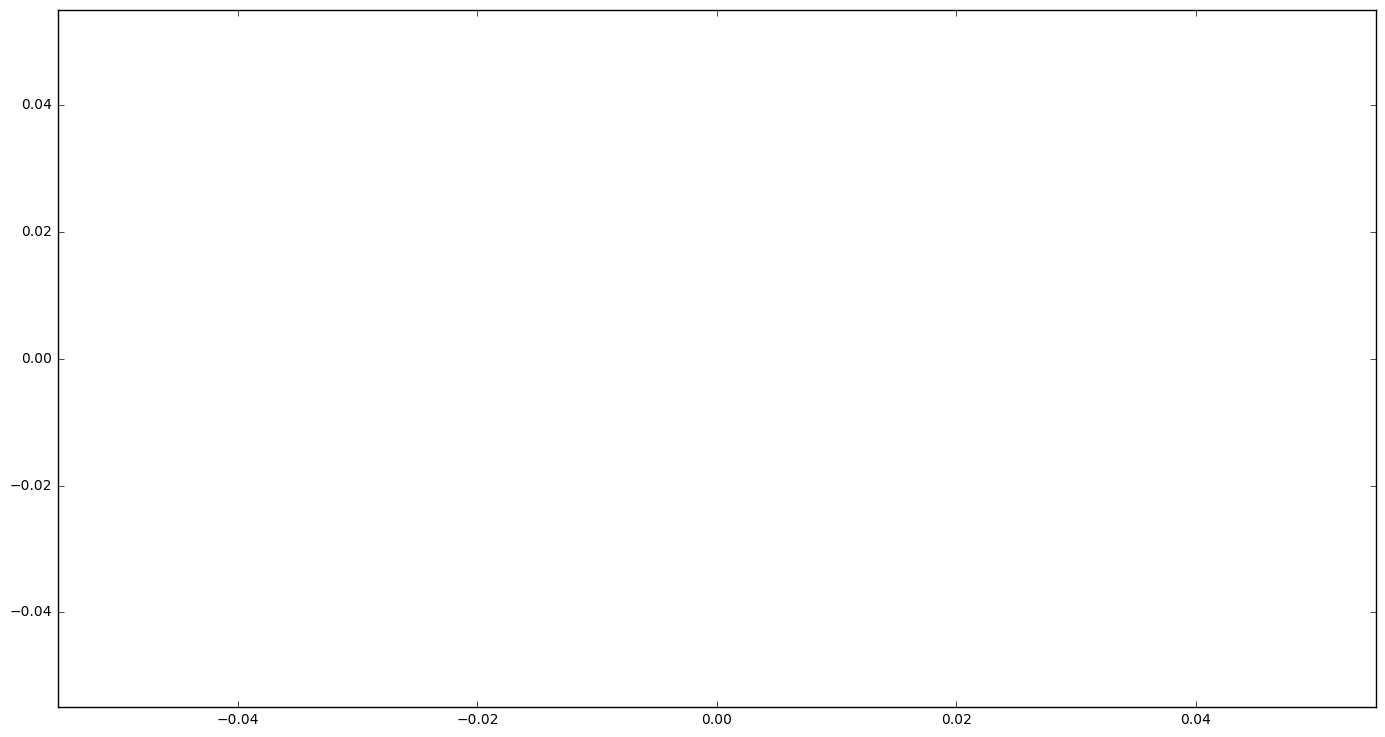

In [206]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
plot_df = pd.DataFrame(dict(x=xs, y=ys, label=one_show_clusters, title=one_show_clusters)) 

#group by cluster
groups = plot_df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], #color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
# ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(plot_df)):
    ax.text(plot_df.ix[i]['x'], plot_df.ix[i]['y'], plot_df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

### Visualization attempts - This is pretty terrible

In [84]:
from sklearn.manifold import TSNE

In [85]:
tsvd_matrix.shape

(216889, 2)

In [125]:
tsne = TSNE()

tsne.fit(tsvd_matrix)
joblib.dump(tsne, 'tsne.pkl')

MemoryError: 

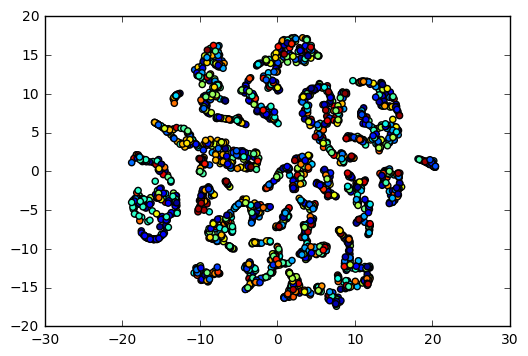

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(graphing_data[:,0], graphing_data[:,1], c=clusters) 

In [39]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

NameError: name 'dist' is not defined

In [79]:
cluster_dict = dict(zip(range(50), cluster_names))

In [80]:
cluster_dict

{0: 'king bc boy old became ',
 1: 'century law called refers man ',
 2: 'one like makes great round ',
 3: 'back north military vietnams january ',
 4: 'played broadway william roles film ',
 5: 'name take holidays may observances ',
 6: 'new served works parts corn ',
 7: 'president party history us members ',
 8: 'collection little san museum circus ',
 9: 'tv movies stars temple played ',
 10: 'composers born daughter virginia italian ',
 11: 'music piece blue title movies ',
 12: 'unit busy canada unit state ',
 13: 'women last gold wins speed ',
 14: 'country miles spain europe african ',
 15: 'food types drinking small cheese ',
 16: 'island flag jack ship show ',
 17: 'x stand clue crew kelly ',
 18: 'mrs smith book mr joseph ',
 19: 'during camps california wwii sites ',
 20: 'authors john presidential englands why ',
 21: 'means e odd way word ',
 22: 'first pass moor thing became ',
 23: 'dogs sea days one alone ',
 24: 'russian word word means fight ',
 25: 'hall dress bar 

In [81]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

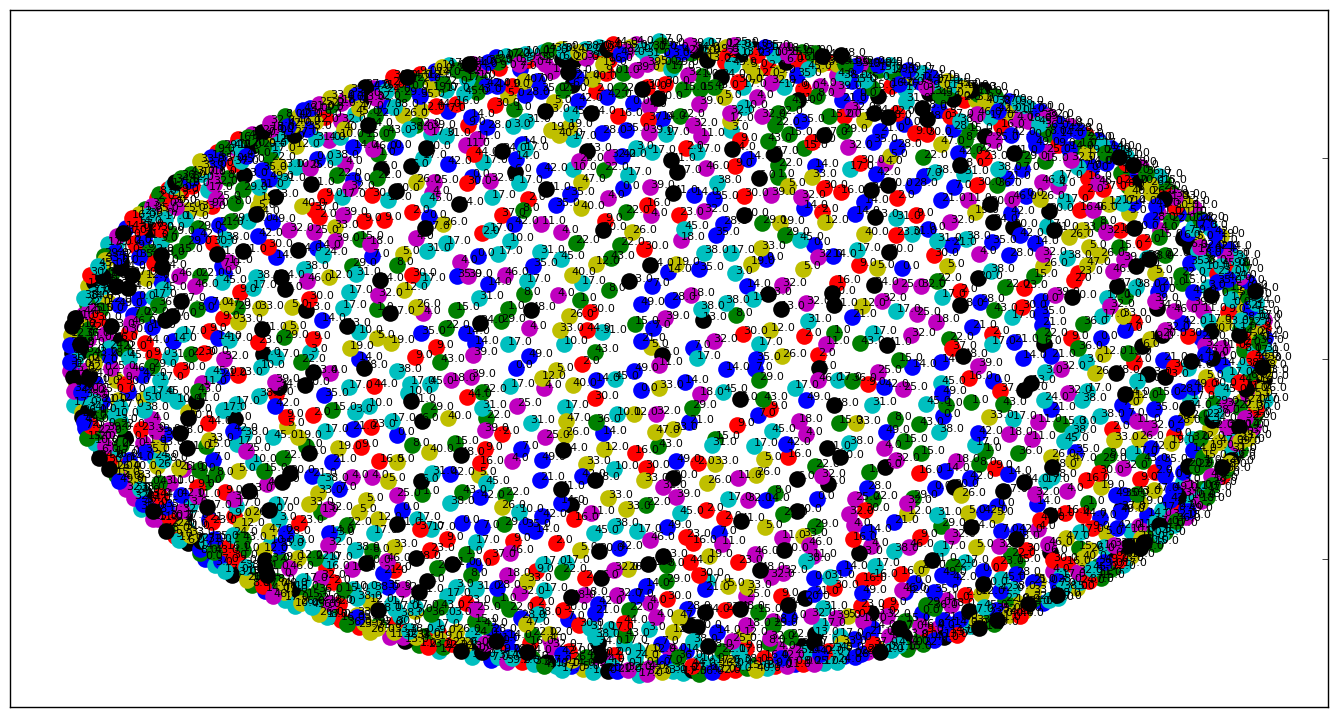

In [83]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
plot_df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=clusters)) 

#group by cluster
groups = plot_df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], #color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
# ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(plot_df)):
    ax.text(plot_df.ix[i]['x'], plot_df.ix[i]['y'], plot_df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

### LDA Attempts - work in progress

In [88]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
#     return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
    return "".join([" "+i if not i.startswith("'") else i for i in tokens]).strip()

In [89]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [90]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in questions]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 41.9 s, sys: 196 ms, total: 42.1 s
Wall time: 41.9 s
CPU times: user 1min 35s, sys: 568 ms, total: 1min 35s
Wall time: 1min 35s
CPU times: user 11.9 s, sys: 128 ms, total: 12.1 s
Wall time: 11.9 s


In [91]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [92]:
# %time lda = models.LdaModel(corpus, num_topics=100, id2word=dictionary, update_every=5, chunksize=10000, passes=100)
%time lda = models.LdaModel(corpus, num_topics=num_clusters, id2word=dictionary)

CPU times: user 12min 41s, sys: 10.2 s, total: 12min 51s
Wall time: 12min 46s


In [93]:
len(lda.show_topics(formatted=False, num_words=20))

10

In [94]:
print(lda[corpus[0]])


topics = lda.print_topics(5, num_words=20)

topics_matrix = lda.show_topics(formatted=False, num_words=20)
# topics_matrix

topics_matrix = np.array(topics_matrix)

# topics_matrix.shape

# topic_words = topics_matrix[:,:,1]

# for i in topic_words:
#     print([str(word) for word in i])
#     print()

[(44, 0.11074969936307823), (47, 0.1010000000000001), (58, 0.10100000000000009), (69, 0.49125030063692243), (95, 0.1010000000000001)]


ValueError: setting an array element with a sequence

In [63]:
lda.show_topics()

[(53,
  u'0.117*work + 0.075*hit + 0.054*featur + 0.043*refer + 0.042*major + 0.041*unit + 0.038*well + 0.038*blue + 0.026*michael + 0.021*bob'),
 (21,
  u'0.076*danc + 0.041*cook + 0.035*januari + 0.031*dish + 0.030*egg + 0.027*creatur + 0.025*coach + 0.024*johnni + 0.023*structur + 0.020*name'),
 (69,
  u'0.138*french + 0.074*black + 0.053*north + 0.044*common + 0.033*wear + 0.032*fine + 0.025*name + 0.018*one + 0.017*experi + 0.016*bit'),
 (49,
  u'0.135*wrote + 0.073*start + 0.052*young + 0.040*earth + 0.027*giant + 0.025*wall + 0.021*winter + 0.018*drive + 0.016*fought + 0.015*rome'),
 (62,
  u'0.074*life + 0.061*nicknam + 0.056*kill + 0.054*record + 0.046*fire + 0.041*singer + 0.031*season + 0.031*real + 0.030*control + 0.021*stage'),
 (17,
  u'0.126*presid + 0.084*hous + 0.063*open + 0.053*publish + 0.046*first + 0.034*franc + 0.034*california + 0.030*didnt + 0.028*christma + 0.022*next'),
 (64,
  u'0.081*game + 0.073*bird + 0.030*speci + 0.029*celebr + 0.025*ball + 0.022*festiv

In [75]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
# topics_matrix = np.array(topics_matrix)
topics_matrix

# topic_words = topics_matrix[:,:,1]
# for i in topic_words:
#     print([str(word) for word in i])
#     print()

[(24,
  [(u'number', 0.074651887616095675),
   (u'go', 0.067500155315878829),
   (u'anim', 0.066764931071219932),
   (u'member', 0.052872595387875337),
   (u'marri', 0.048343330490301831),
   (u'father', 0.048274644405873986),
   (u'would', 0.03904432375143442),
   (u'bear', 0.035297687422902506),
   (u'name', 0.026904521019100031),
   (u'episod', 0.017675872586571658),
   (u'card', 0.015804231188876326),
   (u'weather', 0.014128178466196645),
   (u'arthur', 0.013056963259891913),
   (u'whole', 0.012038782614099347),
   (u'properti', 0.0096324251672476255),
   (u'play', 0.00882432226427491),
   (u'edit', 0.0082124164324315994),
   (u'tail', 0.0082050257261730292),
   (u'happen', 0.008122361698017555),
   (u'specif', 0.0078009149336903932)]),
 (15,
  [(u'letter', 0.075913726603678053),
   (u'machin', 0.036683339993086476),
   (u'peter', 0.035247333026815417),
   (u'wine', 0.035142768612363859),
   (u'object', 0.033217077901473824),
   (u'learn', 0.031080948067850625),
   (u'special', 0.

In [251]:
from collections import Counter

counts = Counter(text.split())

In [ ]:
Counter(df[    ])

(-0.5, 399.5, 199.5, -0.5)

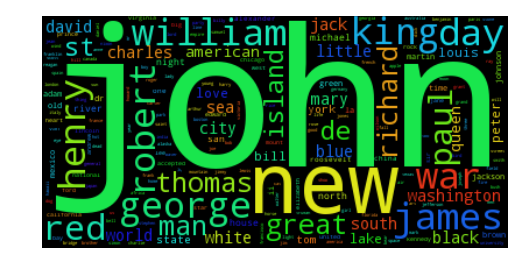

In [261]:
from wordcloud import WordCloud

answers = df['clean_answer'].values
answer_text = ' '.join(answers)

wordcloud = WordCloud().generate(answer_text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(wordcloud)
plt.axis("off")

# # lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()

In [264]:
f = open('answers.txt', 'w')
f.write(answer_text.encode('utf8'))
f.close()

(-0.5, 399.5, 199.5, -0.5)

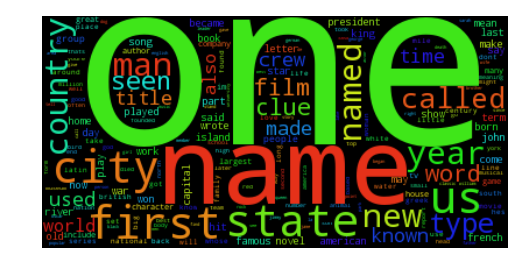

In [260]:
question_text = ' '.join(questions)

wordcloud = WordCloud().generate(question_text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

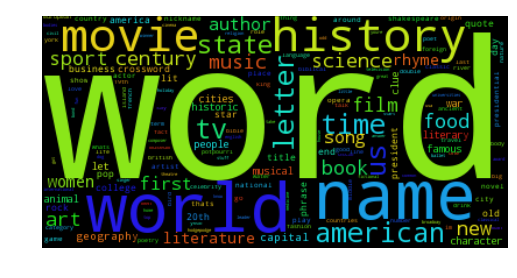

In [262]:
categories = df['clean_category'].values
category_text = ' '.join(categories)

wordcloud = WordCloud().generate(category_text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")